In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

import sys
import os
# Current working directory in Jupyter Notebook
project_root = os.getcwd()  # Current working directory
project_root = os.path.join(project_root, '..')  # Move one level up to the root
sys.path.append(project_root)
# from importlib import reload
# import utils.custom
# reload(utils.custom)
from utils.custom import calculate_metrics, plot_returns
from definitions.constants import SINGLE_RUN_STOCK_DICT_PKL, SINGLE_RUN_RETURNS_PKL, DATE_GS_CUTOFF

with open(SINGLE_RUN_RETURNS_PKL, 'rb') as f:
    returns = pickle.load(f)


In [23]:
with open(SINGLE_RUN_STOCK_DICT_PKL, 'rb') as f:
    dictt = pickle.load(f)

dictt

{'2007-01-31': array(['RIMM', 'PD', 'CMCSA', 'GS', 'X', 'T', 'HPQ', 'CSCO', 'DIS', 'GM'],
       dtype=object),
 '2007-02-28': array(['RIMM', 'PD', 'X', 'GS', 'GM', 'T', 'CMCSA', 'AAPL', 'CSCO', 'VNQ'],
       dtype=object),
 '2007-03-30': array(['X', 'RIMM', 'AAPL', 'T', 'GS', 'MRO', 'CMCSA', 'ORCL', 'CVX',
        'GM'], dtype=object),
 '2007-04-30': array(['X', 'RIMM', 'AAPL', 'MRK', 'T', 'GS', 'MRO', 'CVX', 'IBM', 'ORCL'],
       dtype=object),
 '2007-05-31': array(['RIMM', 'AAPL', 'X', 'MRO', 'T', 'MRK', 'GS', 'NVDA', 'VZ', 'HPQ'],
       dtype=object),
 '2007-06-29': array(['RIMM', 'AAPL', 'NVDA', 'X', 'RIG', 'MRO', 'SLB', 'T', 'GM', 'EEM'],
       dtype=object),
 '2007-07-31': array(['RIMM', 'NVDA', 'AAPL', 'SLB', 'RIG', 'CSCO', 'X', 'AMAT', 'IBM',
        'EEM'], dtype=object),
 '2007-08-31': array(['AAPL', 'NVDA', 'SLB', 'RIG', 'CSCO', 'IBM', 'X', 'INTC', 'OIH',
        'HPQ'], dtype=object),
 '2007-09-28': array(['AAPL', 'NVDA', 'SLB', 'X', 'RIG', 'EEM', 'OIH', 'COP', 'CVX',


In [24]:
xiv_count = 0

# Iterate through the dictionary values
for date, tickers in dictt.items():
    if 'XIV' in tickers:
        xiv_count += 1

print(f"The stock ticker 'XIV' appears {xiv_count} times in the dictionary.")

The stock ticker 'XIV' appears 21 times in the dictionary.


/tmp/ipykernel_43085/4187050076.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'XIV' in tickers:


In [25]:
returns.tail(30)

2022-06-30     0.000000
2022-07-29     0.000000
2022-08-31     0.000000
2022-09-30     0.000000
2022-10-31     0.000000
2022-11-30     0.000000
2022-12-30     0.000000
2023-01-31     0.000000
2023-02-28     0.000000
2023-03-31     0.000000
2023-04-28    12.676925
2023-05-31     8.348220
2023-06-30     5.580709
2023-07-31    -1.427680
2023-08-31   -13.473681
2023-09-29    -5.601731
2023-10-31    15.330546
2023-11-30     9.458858
2023-12-29     9.110904
2024-01-31    24.592142
2024-02-29     6.325290
2024-03-28   -12.994770
2024-04-30    17.602587
2024-05-31     3.305477
2024-06-28    -8.241074
2024-07-31    -2.289200
2024-08-30     5.138568
2024-09-30     4.530245
2024-10-31    17.516221
2024-11-29     0.000000
dtype: float64

In [26]:
annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=returns)
# Print results
print(f"Annual Return: {annual_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")

Annual Return: 21.66%
Sharpe Ratio: 0.91
Max Drawdown: 26.88%
Calmar Ratio: 0.81
Sortino Ratio: 1.42


In [27]:
annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=returns)

# Print results
print(f"Annual Return: {annual_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")

Annual Return: 21.66%
Sharpe Ratio: 0.91
Max Drawdown: 26.88%
Calmar Ratio: 0.81
Sortino Ratio: 1.42


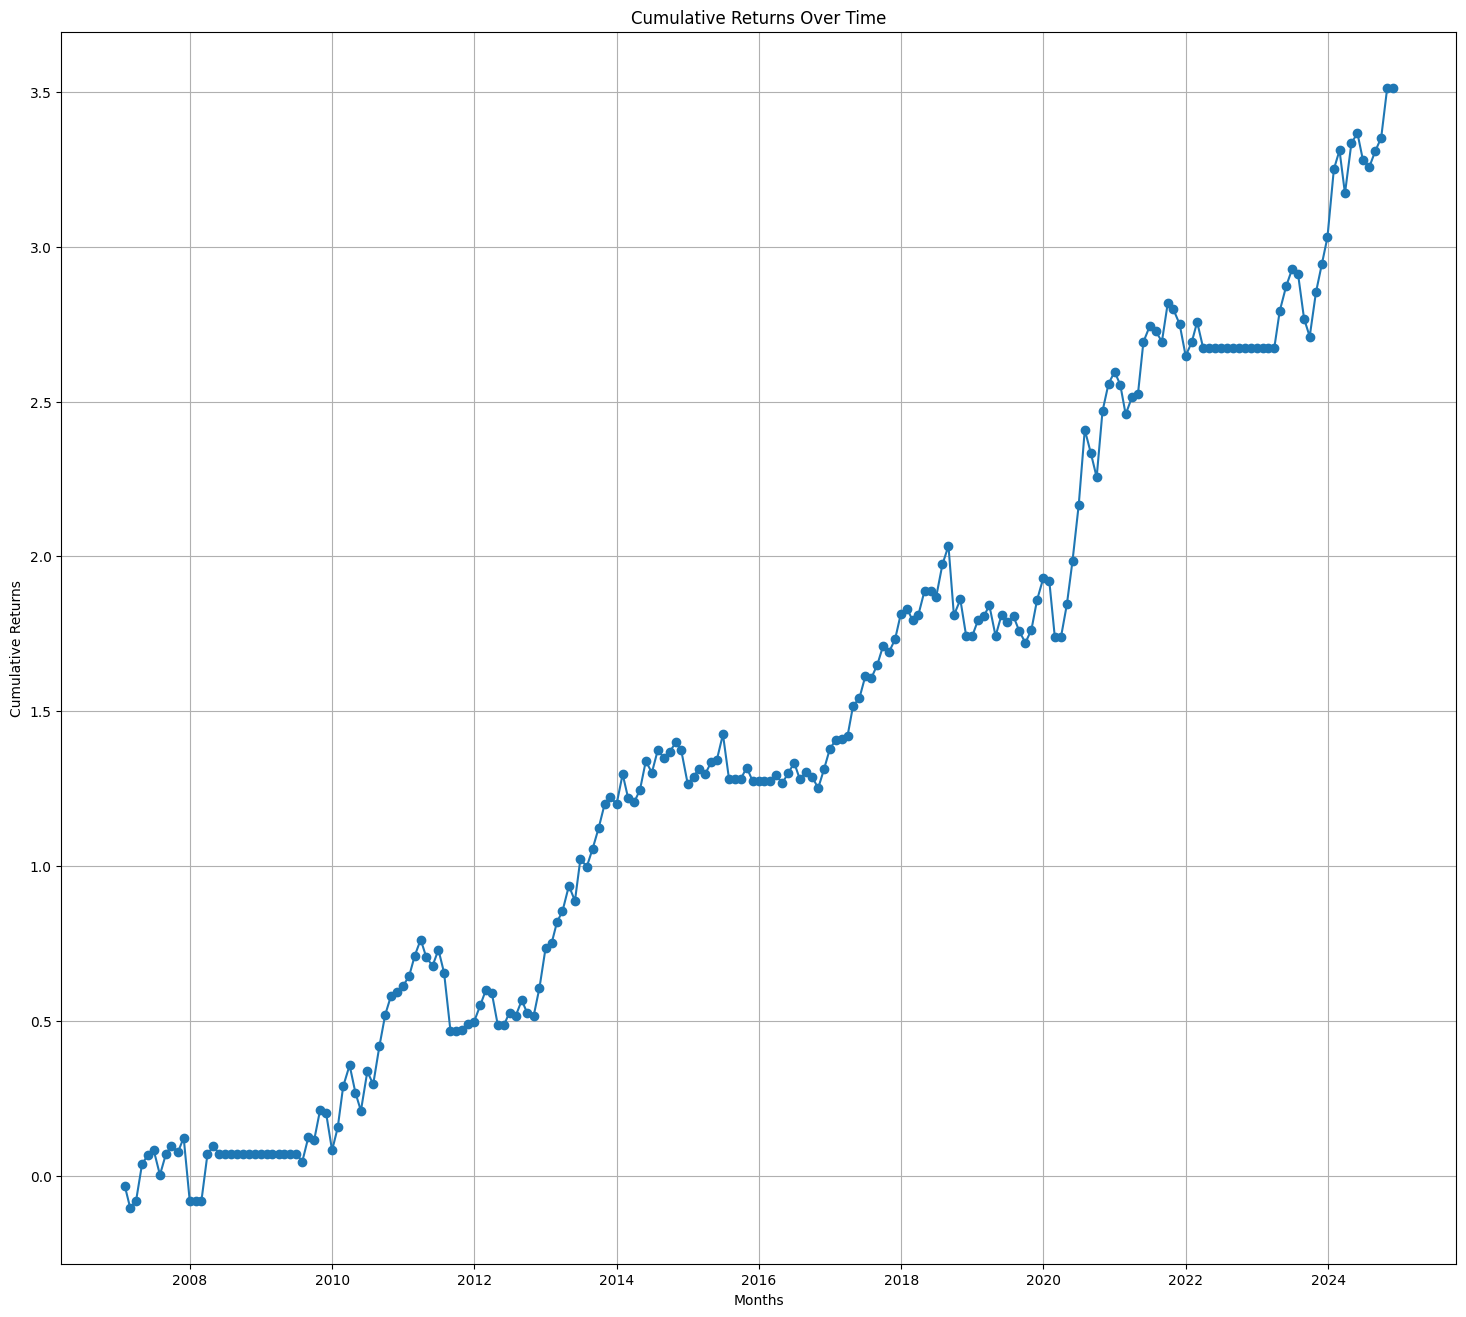

In [28]:
plot_returns(returns=returns)